In [1]:
import requests
import json
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import praw
import redditHelperFunctions as rhf


from bs4 import BeautifulSoup

import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import nltk


In [2]:
# # Download NLTK resources
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

## Part 1: Praw

In [3]:
#read in reddit credentials
# reddit_login is a json file containing credentials for the reddit API.


with open('reddit_login.json','r') as f:
    r_creds = json.load(f)
r = praw.Reddit(
    client_id = r_creds['client_id'],
    client_secret = r_creds['client_secret'],
    password = r_creds['password'],
    user_agent = r_creds['user_agent'],
    username = r_creds['username']
)

In [4]:
#air_subreddit_submissions = rhf.get_submissions('AirQuality', 1000)
#air_subreddit_submissions.to_csv('air_subreddit_submissions.csv', index=False)
air_subreddit_submissions_df = pd.read_csv('./data/air_subreddit_submissions.csv') 
air_subreddit_submissions_df

,title,selftext,score,created_utc
0,The reason i don't live in china *minus the ot...,NaN,3,2025-01-26 17:39:00
1,LA air & tomorrow’s rain,"Obviously the fires have been horrible, and th...",13,2025-01-25 23:52:33
2,Which portable air quality device to puchase?,I plan to puchase air quality device I can car...,3,2025-01-25 01:00:59
3,NYT: Airborne Lead and Chlorine Levels Soared ...,"Headline is obvious, but the article reference...",7,2025-01-24 21:20:23
4,Poor CO2 Levels,I live in 1920s apartment building in LA. A l...,4,2025-01-24 16:40:23
...,...,...,...,...
995,A 100 year old paper article about 'climate ch...,NaN,5,2017-06-08 09:28:51
996,Google Street View vehicles now measuring air ...,NaN,5,2017-06-06 04:04:28
997,Research: Stale Office Air Is Making You Less ...,NaN,4,2017-04-26 10:01:49
998,US Defence Secretary James Mattis says climate...,NaN,4,2017-03-15 16:09:25


In [5]:
## Creating a function to systematically label the documents differently

def make_text_files(json_file):
    with open('./data/'+json_file, 'r') as f:
        data = json.load(f)
    data

    os.listdir('./data')
    listOfSubreddits = []

    # making files for all the data
    for i in data:
        print(i['subreddit'])
        listOfSubreddits.append(i['subreddit'])
        with open(f"./data/text_corpus/{i['subreddit']}.txt", 'w') as f:
            f.write('\n'.join(i['comments']))
    print(len(listOfSubreddits))
    print(len(set(listOfSubreddits)))

#create a directory for each subreddit adding a list of the documents to each

make_text_files('climate_change.json')

        

Conservative
facepalm
MarkMyWords
climatechange
Conservative
climatechange
NoStupidQuestions
LeopardsAteMyFace
LeopardsAteMyFace
climatechange
clevercomebacks
Futurology
facepalm
science
climate
news
WhitePeopleTwitter
nottheonion
climate
therewasanattempt
PoliticalHumor
pics
climatechange
EconomyCharts
WhitePeopleTwitter
climate
interestingasfuck
collapse
climatechange
LeopardsAteMyFace
ClimateOffensive
climate
WomenInNews
politics
LeopardsAteMyFace
inthenews
preppers
facepalm
Damnthatsinteresting
anime_titties
technology
science
atheism
CreationNtheUniverse
WhitePeopleTwitter
MapPorn
climate
UpliftingNews
climatechange
Futurology
PeterExplainsTheJoke
WatchPeopleDieInside
politics
collapse
Damnthatsinteresting
WitchesVsPatriarchy
news
WhitePeopleTwitter
MurderedByWords
nottheonion
climate
61
35


In [6]:
## Lets start getting our Bag of Words model ready!

with open('./data/output_2.json', 'r') as f:
    data = json.load(f)
data

[{'search_term': 'air pollution',
  'title': 'Air pollution in Delhi, India reached record levels of AQI 978 and some areas reaching 1300 which is equivalent to smoking more than 50 cigarettes per day',
  'subreddit': 'interestingasfuck',
  'text': 'No Text',
  'comments': ['What is the reason for the drastic change?',
   'Two and a half packs for anyone unfamiliar with cigarette packaging\xa0',
   'What happened on 27 sept 2024 to make it so clear?',
   'This makes smoking looks less bad',
   'On the other hand that’s a lot of value, 50 cigarettes a day for free??',
   'So this is what 1875 london or new york looked like, interesting',
   'I smoke 50 cigarettes at happy hour with a double of whiskey. Is this what my insides look like?',
   'poor planet',
   'Decided to visit Delhi last year during this time. It was awful, I couldn’t breath and felt like I was dying the whole trip. Probably took years off my life!',
   'What the fuck',
   'Universal free cigarettes!!!',
   'What doesn’

In [7]:
with open('./data/text_corpus/climatechange.txt', 'r') as f:
    data = f.read()
    print((data))

The next two months will be the peak hurricane season where 15 hurricanes are predicted. Upcoming events may finally force them to accept climate change.
Climate change is illegal in Florida
Great. Floridian migrants. Like peanut butter, they'll be spreading their nuttiness all over the US.
Zero sympathy for climate deniers.

Edit: y’all are making some wild assumptions about me based off of this comment. 

A. Let’s start with the fact that I am from the south, love it, and have family everywhere from Florida, to Georgia (home state), Alabama, North Carolina, and Louisiana. 
B. My comment wasn’t political. I couldn’t care less whether you are Republican or Democrat. Met plenty of smart, level headed folks from both sides and an equal amount of people believing in nonsense such and climate change deniers and antivaxxers.
C. My comment was simply that people who are climate deniers and are complaining about the severe weather (yep this includes family members) get no sympathy from me. Ju

In [8]:
os.listdir('./data/text_corpus')

['nottheonion.txt',
 'Futurology.txt',
 'clevercomebacks.txt',
 'LeopardsAteMyFace.txt',
 'climatechange.txt',
 'CreationNtheUniverse.txt',
 'preppers.txt',
 'anime_titties.txt',
 'ClimateOffensive.txt',
 'EconomyCharts.txt',
 'news.txt',
 'NoStupidQuestions.txt',
 'collapse.txt',
 'science.txt',
 'inthenews.txt',
 'climate.txt',
 'atheism.txt',
 'UpliftingNews.txt',
 'Damnthatsinteresting.txt',
 'politics.txt',
 'MurderedByWords.txt',
 'MapPorn.txt',
 'WomenInNews.txt',
 'facepalm.txt',
 'PoliticalHumor.txt',
 'technology.txt',
 'therewasanattempt.txt',
 'WitchesVsPatriarchy.txt',
 'WhitePeopleTwitter.txt',
 'pics.txt',
 'WatchPeopleDieInside.txt',
 'Conservative.txt',
 'interestingasfuck.txt',
 'MarkMyWords.txt',
 'PeterExplainsTheJoke.txt']

In [9]:


path = '/Users/davidlapaglia/Documents/School/INFO Coding/INFO_5652/text_mining-1/data/text_corpus'
ListOfCompleteFilePaths = []
listOfFileNames = [] 
print()
print("Calling os.listdir()...")
print("Quantity of listfit()>>>>",len(os.listdir()))
print(os.listdir())
for name in os.listdir(path):
    
    
    nextfile=path + "/" + name  
    print("Next File: ", nextfile)
    ListOfCompleteFilePaths.append(nextfile) 
    nextnameL=name.split(".")   ##spliting on the file extension
    print(nextnameL[0])  ### getting the name of the file without the file 
    #extension
    listOfFileNames.append(nextnameL[0])


print("List of complete file paths...\n")
print(ListOfCompleteFilePaths)
print("list of just names:\n")
print(listOfFileNames)

print("____________________")

 


Calling os.listdir()...
Quantity of listfit()>>>> 11
['.DS_Store', 'reddit_login.json', '__pycache__', 'text_mining-1.ipynb', 'news_api_creds.json', 'text_mining-1', '.ipynb_checkpoints', '.vscode', 'redditHelperFunctions.py', 'data', 'news_api_processor.py']
Next File:  /Users/davidlapaglia/Documents/School/INFO Coding/INFO_5652/text_mining-1/data/text_corpus/nottheonion.txt
nottheonion
Next File:  /Users/davidlapaglia/Documents/School/INFO Coding/INFO_5652/text_mining-1/data/text_corpus/Futurology.txt
Futurology
Next File:  /Users/davidlapaglia/Documents/School/INFO Coding/INFO_5652/text_mining-1/data/text_corpus/clevercomebacks.txt
clevercomebacks
Next File:  /Users/davidlapaglia/Documents/School/INFO Coding/INFO_5652/text_mining-1/data/text_corpus/LeopardsAteMyFace.txt
LeopardsAteMyFace
Next File:  /Users/davidlapaglia/Documents/School/INFO Coding/INFO_5652/text_mining-1/data/text_corpus/climatechange.txt
climatechange
Next File:  /Users/davidlapaglia/Documents/School/INFO Coding/

In [10]:
import glob
import re
# to find all the text files in the directory

In [11]:
txt_files = glob.glob(os.path.join('./data/text_corpus_processed', '*.txt'))

def remove_urls(text):
    return re.sub(r'http\S+|www\S+|com\S+', '', text)

def preprocess_text(text):  # Preprocess and Lemmatize Text
    tokens = word_tokenize(text.lower())

    stop_words = set(stopwords.words('english'))  # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]

    tokens = [word for word in tokens if len(word) > 1]  # remove single-letter words


    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()

   # print("\nOriginal Tokens:", tokens[:10])  # print first 10 tokens

    tokens = [lemmatizer.lemmatize(token) for token in tokens]
   # print("Lemmatized Tokens:", tokens[:10])  # print after lemmatization

    tokens = [stemmer.stem(token) for token in tokens]
  #  print("Stemmed Tokens:", tokens[:10])  # print after stemming

    return ' '.join(tokens)

for txt in txt_files:
    with open(txt, 'r', encoding='utf-8') as f:
        text = f.read()
        preprocessed_text = preprocess_text(text)
        preprocessed_text = remove_urls(text)
        with open(txt, 'w', encoding='utf-8') as f:
            f.write(preprocessed_text)

       


In [12]:
myVectorizer = CountVectorizer(input='filename',
                               max_features=1000,# am taking out stopwords with nltk already
                                token_pattern=r'(?u)(?!http[s]?://\S+)(?!www\.\S+)\b\w+\b',
                               preprocessor=preprocess_text # preprocessing with a custom made fucntion
                               ) 

DTM = myVectorizer.fit_transform(ListOfCompleteFilePaths)

columnNames=myVectorizer.get_feature_names_out()

corpus_df_reddit=pd.DataFrame(DTM.toarray(),columns=columnNames)

corpus_df_reddit




myDict = {}
for i in range(0, len(listOfFileNames)):
    myDict[i] = listOfFileNames[i].rstrip('0123456789') # this isn't 
    # working as intended but if the doc has no label that is important
    # then it doesn't matter
    
print("Dictionary: ",myDict)
corpus_df_reddit = corpus_df_reddit.rename(myDict, axis='index')
corpus_df_reddit.to_csv('./data/corpus_df_reddit_processed.csv')

Dictionary:  {0: 'nottheonion', 1: 'Futurology', 2: 'clevercomebacks', 3: 'LeopardsAteMyFace', 4: 'climatechange', 5: 'CreationNtheUniverse', 6: 'preppers', 7: 'anime_titties', 8: 'ClimateOffensive', 9: 'EconomyCharts', 10: 'news', 11: 'NoStupidQuestions', 12: 'collapse', 13: 'science', 14: 'inthenews', 15: 'climate', 16: 'atheism', 17: 'UpliftingNews', 18: 'Damnthatsinteresting', 19: 'politics', 20: 'MurderedByWords', 21: 'MapPorn', 22: 'WomenInNews', 23: 'facepalm', 24: 'PoliticalHumor', 25: 'technology', 26: 'therewasanattempt', 27: 'WitchesVsPatriarchy', 28: 'WhitePeopleTwitter', 29: 'pics', 30: 'WatchPeopleDieInside', 31: 'Conservative', 32: 'interestingasfuck', 33: 'MarkMyWords', 34: 'PeterExplainsTheJoke'}


In [13]:
with open('./data/corpus_df_reddit_processed.csv', 'r') as f:
    corpus_df = pd.read_csv(f)

corpus_df

,Unnamed: 0,0,000,1,10,100,1000,12,15,2,...,worth,would,wow,wrong,ye,yeah,year,yet,zero,zone
0,nottheonion,0,1,0,0,2,0,0,0,0,...,0,8,0,2,0,3,2,2,0,0
1,Futurology,0,2,2,4,9,0,0,1,0,...,0,13,0,2,0,1,22,3,0,0
2,clevercomebacks,0,0,0,1,0,0,0,0,1,...,0,9,0,8,1,1,17,3,1,0
3,LeopardsAteMyFace,1,0,1,0,0,0,0,1,2,...,2,3,0,3,0,2,8,1,0,0
4,climatechange,0,0,0,1,4,0,0,1,0,...,0,8,0,1,2,2,14,0,1,1
5,CreationNtheUniverse,0,0,0,0,0,0,0,1,0,...,0,6,2,2,1,1,1,1,0,1
6,preppers,0,0,1,3,4,2,0,0,1,...,1,11,0,1,6,2,25,1,0,7
7,anime_titties,0,0,0,2,1,0,0,1,0,...,0,7,0,0,0,3,7,0,0,0
8,ClimateOffensive,0,0,0,1,0,0,0,1,0,...,0,4,0,0,0,0,2,0,1,0
9,EconomyCharts,3,2,2,1,2,0,0,0,1,...,0,3,1,5,4,1,11,1,1,0


Index(['Unnamed: 0', '0', '000', '1', '10', '100', '1000', '12', '15', '2',
       ...
       'worth', 'would', 'wow', 'wrong', 'ye', 'yeah', 'year', 'yet', 'zero',
       'zone'],
      dtype='object', length=1001)


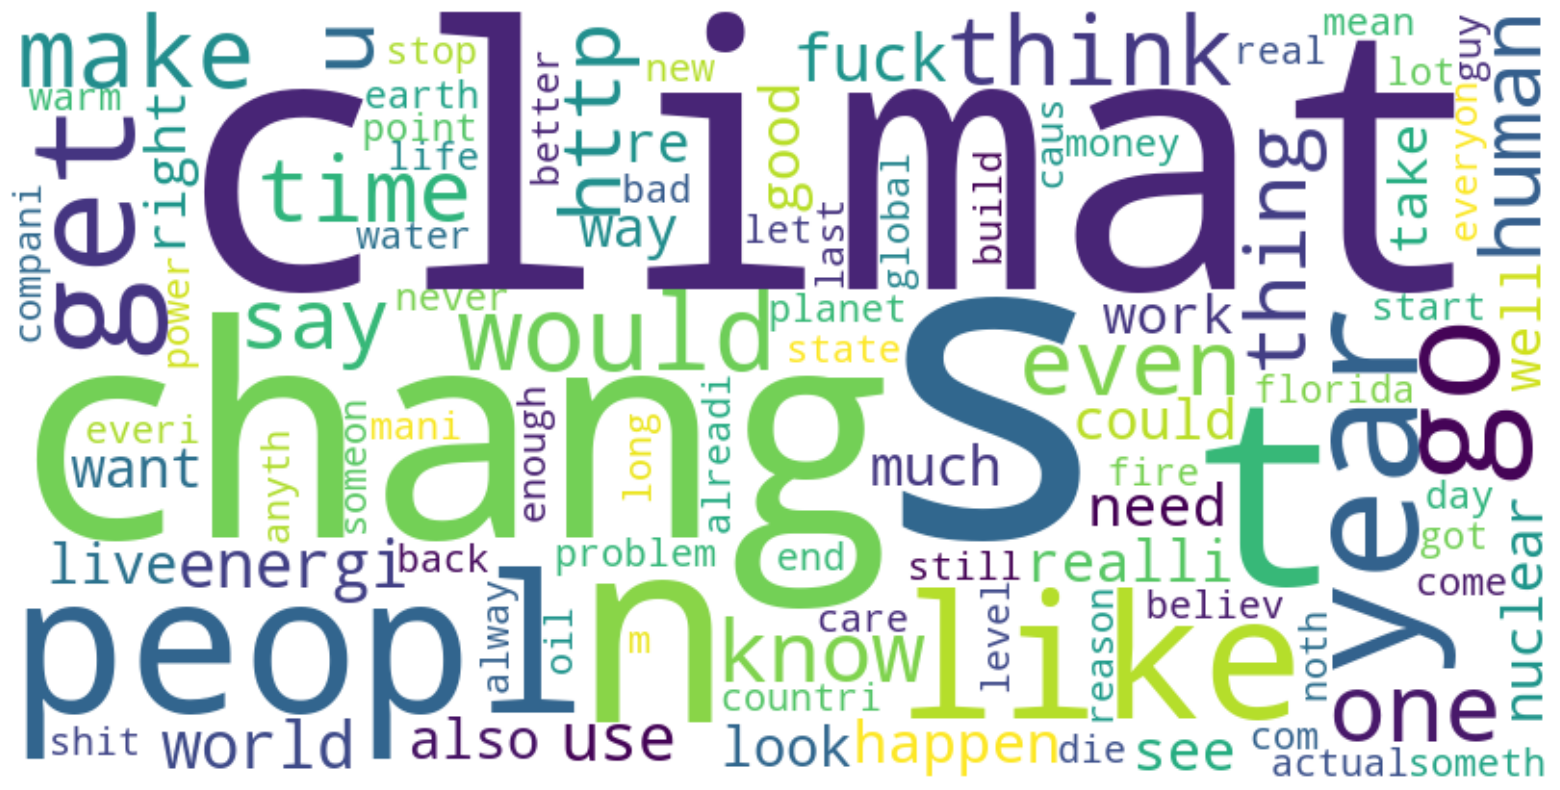

In [14]:
print(corpus_df.columns)

# We need to convert for frequency of words so lets use hashmap to keeptrack of words that 
word_freq = {}
for word in corpus_df.columns:
    freq = pd.to_numeric(corpus_df[word], errors='coerce').sum()
    if freq > 0:  # only include words that appear at least once
        word_freq[word] = freq



wordcloud = WordCloud(
    width=800, 
    height=400,
    background_color='white',
    max_words=100,
    contour_width=3,
    contour_color='steelblue'
).generate_from_frequencies(word_freq)


plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Part 2: News Api

In [15]:
### Second Data Source: News API


with open('news_api_creds.json','r') as f:
    n_creds = json.load(f)


In [16]:
topic = 'air pollution'
URLPost = {
    'apiKey':n_creds['api_key'],
    'source': 'bbc-news',
    'pageSize': 100,
    'totalRequests': 100,
    'q':'air pollution'}
req = requests.get('https://newsapi.org/v2/everything', params=URLPost)

In [17]:
n_data = req.json()

In [18]:
n_data

{'status': 'ok',
 'totalResults': 1412,
 'articles': [{'source': {'id': None, 'name': 'NPR'},
   'author': 'Alejandra Borunda',
   'title': 'Is the air quality index actually useful right now?',
   'description': 'The air has improved in the LA region as firefighters get blazes under control, but there are questions about how safe the air actually is.',
   'url': 'https://www.npr.org/2025/01/18/nx-s1-5266139/los-angeles-fires-smoke-air-quality-health-tips',
   'urlToImage': 'https://npr.brightspotcdn.com/dims3/default/strip/false/crop/3000x1688+0+157/resize/1400/quality/100/format/jpeg/?url=http%3A%2F%2Fnpr-brightspot.s3.amazonaws.com%2Fa2%2F06%2Fdb2f649a47f799dd691148da7679%2Faltadena-5.jpg',
   'publishedAt': '2025-01-18T12:00:00Z',
   'content': 'Air quality in Los Angeles has improved as the Palisades and Eaton wildfires get under control. But as the fires burned through houses, cars and industrial areas, they spewed out vast amounts of smok… [+6171 chars]'},
  {'source': {'id': No

In [19]:
type(req.json())

dict

In [20]:
n_data.keys()

dict_keys(['status', 'totalResults', 'articles'])

In [21]:
len(n_data['articles'])


94

In [22]:
counter = 0
listofURLs = []
for i in n_data['articles']:
    listofURLs.append(i['url'])
    counter += 1

print(counter)
print(listofURLs)

94
['https://www.npr.org/2025/01/18/nx-s1-5266139/los-angeles-fires-smoke-air-quality-health-tips', 'https://news.slashdot.org/story/25/02/04/1453255/lung-cancer-diagnoses-on-the-rise-among-never-smokers-worldwide', 'https://www.yahoo.com/news/research-reveals-little-known-danger-110024966.html', 'https://www.npr.org/2025/01/29/nx-s1-5278637/why-members-of-two-epa-science-advisory-committees-were-let-go', 'https://thenextweb.com/news/swedish-startup-adsorbi-wood-based-material-air-purification', 'https://www.bbc.com/news/videos/c6267z15epgo', 'https://gizmodo.com/we-finally-know-why-the-oceans-are-on-a-record-hot-streak-2000556527', 'https://www.yahoo.com/news/scientists-disturbing-discovery-while-studying-103028262.html', 'https://kottke.org/25/02/0046157-the-world-has-probably-pa', 'https://subscriber.politicopro.com/article/eenews/2025/02/12/trump-set-a-deadline-on-the-endangerment-finding-heres-how-it-could-play-out-00203693', 'https://www.newscientist.com/article/2466828-is-cleane

In [23]:
for i in n_data['articles']:
    print(i['title'])
    print(i['description'])
    print(i['url'])
    print(i['publishedAt'])
    print(i['content'])
    print('______________________')


    

Is the air quality index actually useful right now?
The air has improved in the LA region as firefighters get blazes under control, but there are questions about how safe the air actually is.
https://www.npr.org/2025/01/18/nx-s1-5266139/los-angeles-fires-smoke-air-quality-health-tips
2025-01-18T12:00:00Z
Air quality in Los Angeles has improved as the Palisades and Eaton wildfires get under control. But as the fires burned through houses, cars and industrial areas, they spewed out vast amounts of smok… [+6171 chars]
______________________
Lung Cancer Diagnoses On the Rise Among Never-Smokers Worldwide
The proportion of people being diagnosed with lung cancer who have never smoked is increasing, with air pollution an "important factor," the World Health Organization's cancer agency has said. From a report: Lung cancer in people who have never smoked cigaret…
https://news.slashdot.org/story/25/02/04/1453255/lung-cancer-diagnoses-on-the-rise-among-never-smokers-worldwide
2025-02-04T16:00:0

In [24]:

# Off shoot of the news api json structure to create a file for each source

# Creating multiple folders for the different query - sort of two labels for this data!
def make_text_files_data_ap(json_file):
    with open('./data/'+json_file, 'r') as f:
        data = json.load(f)
    data

    os.listdir('./data')
    listOfArticles = []
    all_sources = []
    # Making files for all the data
    articles = data.get("articles", [])  
    for article in data['articles']:
        source_name = article['source']['name'].replace('/', '_').replace(' ', '_')
        all_sources.append(source_name)
        content = []
        
        content.append(article['title'])
        
        if article.get('description'):
            content.append(article['description'])
        
        if article.get('content'):
            content.append(article['content'])
        
        with open(f"./data/news_api_air_pollution/{source_name}.txt", 'a', encoding='utf-8') as f:
            f.write('\n\n'.join(content) + '\n\n---\n\n')


def make_text_files_data_cc(json_file):
    with open('./data/'+json_file, 'r') as f:
        data = json.load(f)
    data

    os.listdir('./data')
    listOfArticles = []
    all_sources = []
    # Making files for all the data
    articles = data.get("articles", [])  
    for article in data['articles']:
        source_name = article['source']['name'].replace('/', '_').replace(' ', '_')
        all_sources.append(source_name)
        content = []
        
        content.append(article['title'])
        
        if article.get('description'):
            content.append(article['description'])
        
        if article.get('content'):
            content.append(article['content'])
        
        with open(f"./data/news_api_climate_change/{source_name}.txt", 'a', encoding='utf-8') as f:
            f.write('\n\n'.join(content) + '\n\n---\n\n')


#make_text_files_data_ap('news_api_air_pollution.json')
#make_text_files_data_cc('news_api_climate_change.json')

In [25]:
#Something I wrote early on and dont want to delete but this shows my thinking process?

# with open('./data/news_api_air_pollution.json', 'w', encoding='utf-8') as f:
#     json.dump(n_data, f, indent=4)


In [26]:
#Experimenting and cleaning some of the output data from news_api

with open('./data/news_api_air_pollution.json', 'r') as f:
    n_data = json.load(f)

df = pd.DataFrame([{'source': i['source']['name'], 'content': i['content']} for i in n_data['articles']])
df['content'] = df['content'].str.replace(r'\\n', ' ')
df['content'] = df['content'].str.replace(r'<ul>', ' ')



for thing in df['content']:
    print(thing)

Air quality in Los Angeles has improved as the Palisades and Eaton wildfires get under control. But as the fires burned through houses, cars and industrial areas, they spewed out vast amounts of smok… [+6171 chars]
Lung cancer in people who have never smoked cigarettes or tobacco is now estimated to be the fifth highest cause of cancer deaths worldwide, according to the International Agency for Research on Canc… [+520 chars]
A new study suggests that air pollution can affect the fertility rates of all people, not just mothers or others who can bear children.
What's happening?
The Guardian reported on a study published … [+2253 chars]
Members of two of the Environmental Protection Agency's most influential advisory committees, tasked with providing independent scientific guidance to the head of the agency, found out Tuesday evenin… [+3252 chars]
Swedish startup Adsorbi has secured 1mn to ramp up production of a cellulose-based material that sucks up pollutants from the air. 
Metsä Sprin

In [27]:
with open('./data/news_api_climate_change.json', 'r') as f:
    news_api_climate_change = json.load(f)


with open ('./data/news_api_air_pollution.json', 'r') as f:
    news_api_air_pollution = json.load(f)

In [28]:
news_api_climate_change['articles'][0].keys()

dict_keys(['source', 'author', 'title', 'description', 'url', 'urlToImage', 'publishedAt', 'content'])

In [29]:
# do it for the air_pollution corpus from news api

path = "/Users/davidlapaglia/Documents/School/INFO Coding/INFO_5652/text_mining-1/data/news_api_air_pollution_corpus"
ListOfCompleteFilePaths = []
listOfFileNames = [] 
print()
print("Calling os.listdir()...")
print("Quantity of listfit()>>>>",len(os.listdir()))
print(os.listdir())
for name in os.listdir(path):
    
    
    nextfile=path + "/" + name  
    print("Next File: ", nextfile)
    ListOfCompleteFilePaths.append(nextfile) 
    nextnameL=name.split(".")   ##spliting on the file extension
    print(nextnameL[0])  ### getting the name of the file without the file 
    #extension
    listOfFileNames.append(nextnameL[0])


print("List of complete file paths...\n")
print(ListOfCompleteFilePaths)
print("list of just names:\n")
print(listOfFileNames)

print("____________________")

# Create a CountVectorizer object
myVectorizer = CountVectorizer(input='filename',
                            stop_words='english', # English stop words
                            max_features=1000,
                            token_pattern=r'[a-zA-Z]+'
                            ) # Make sure to take out numbers and punctuation

DTM = myVectorizer.fit_transform(ListOfCompleteFilePaths)

columnNames=myVectorizer.get_feature_names_out()

corpus_df_news_api_air_pollution_corpus=pd.DataFrame(DTM.toarray(),columns=columnNames)

corpus_df_news_api_air_pollution_corpus




myDict = {}
for i in range(0, len(listOfFileNames)):
    myDict[i] = listOfFileNames[i].rstrip('0123456789') # this isn't 
    # working as intended but if the doc has no label that is important
    # then it doesn't matter
    
print("Dictionary: ",myDict)
corpus_df_news_api_air_pollution_corpus = corpus_df_news_api_air_pollution_corpus.rename(myDict, axis='index')
corpus_df_news_api_air_pollution_corpus.to_csv('./data/corpus_df_news_api_air_pollution_corpus.csv')
corpus_df_news_api_air_pollution_corpus


Calling os.listdir()...
Quantity of listfit()>>>> 11
['.DS_Store', 'reddit_login.json', '__pycache__', 'text_mining-1.ipynb', 'news_api_creds.json', 'text_mining-1', '.ipynb_checkpoints', '.vscode', 'redditHelperFunctions.py', 'data', 'news_api_processor.py']
Next File:  /Users/davidlapaglia/Documents/School/INFO Coding/INFO_5652/text_mining-1/data/news_api_air_pollution_corpus/Android_Authority.txt
Android_Authority
Next File:  /Users/davidlapaglia/Documents/School/INFO Coding/INFO_5652/text_mining-1/data/news_api_air_pollution_corpus/The_Times_of_India.txt
The_Times_of_India
Next File:  /Users/davidlapaglia/Documents/School/INFO Coding/INFO_5652/text_mining-1/data/news_api_air_pollution_corpus/Nist.gov.txt
Nist
Next File:  /Users/davidlapaglia/Documents/School/INFO Coding/INFO_5652/text_mining-1/data/news_api_air_pollution_corpus/Vox.txt
Vox
Next File:  /Users/davidlapaglia/Documents/School/INFO Coding/INFO_5652/text_mining-1/data/news_api_air_pollution_corpus/Naturalnews.com.txt
Na

,ability,abuses,ac,academic,accelerating,according,accurate,acres,act,activities,...,world,worldwide,worry,worse,worsening,worst,year,years,young,zones
Android_Authority,0,0,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The_Times_of_India,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8,0,0,0
Nist,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
Vox,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8,0,0,0
Naturalnews,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gizmodo,0,0,0,12,0,4,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0
Politicopro,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,4,4,0,0
Yanko_Design,0,0,0,0,0,0,0,0,0,0,...,8,0,0,0,0,0,0,0,0,0
Quartz_India,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Grist,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,24,0,0


In [30]:
# do it for the climate_change corpus from news api

path = "/Users/davidlapaglia/Documents/School/INFO Coding/INFO_5652/text_mining-1/data/news_api_climate_change_corpus"
ListOfCompleteFilePaths = []
listOfFileNames = [] 
print()
print("Calling os.listdir()...")
print("Quantity of listfit()>>>>",len(os.listdir()))
print(os.listdir())
for name in os.listdir(path):
    
    
    nextfile=path + "/" + name  
    print("Next File: ", nextfile)
    ListOfCompleteFilePaths.append(nextfile) 
    nextnameL=name.split(".")   ##spliting on the file extension
    print(nextnameL[0])  ### getting the name of the file without the file 
    #extension
    listOfFileNames.append(nextnameL[0])


print("List of complete file paths...\n")
print(ListOfCompleteFilePaths)
print("list of just names:\n")
print(listOfFileNames)

print("____________________")

# Create a CountVectorizer object
myVectorizer = CountVectorizer(input='filename',
                            stop_words='english', # English stop words
                            max_features=1000,
                            token_pattern=r'[a-zA-Z]+'
                            ) # Make sure to take out numbers and punctuation

DTM = myVectorizer.fit_transform(ListOfCompleteFilePaths)

columnNames=myVectorizer.get_feature_names_out()

corpus_df_news_api_climate_change_corpus=pd.DataFrame(DTM.toarray(),columns=columnNames)

corpus_df_news_api_climate_change_corpus




myDict = {}
for i in range(0, len(listOfFileNames)):
    myDict[i] = listOfFileNames[i].rstrip('0123456789') # this isn't 
    # working as intended but if the doc has no label that is important
    # then it doesn't matter
    
print("Dictionary: ",myDict)
corpus_df_news_api_climate_change_corpus = corpus_df_news_api_climate_change_corpus.rename(myDict, axis='index')
corpus_df_news_api_climate_change_corpus.to_csv('./data/corpus_df_news_api_climate_change_corpus.csv')
corpus_df_news_api_climate_change_corpus


Calling os.listdir()...
Quantity of listfit()>>>> 11
['.DS_Store', 'reddit_login.json', '__pycache__', 'text_mining-1.ipynb', 'news_api_creds.json', 'text_mining-1', '.ipynb_checkpoints', '.vscode', 'redditHelperFunctions.py', 'data', 'news_api_processor.py']
Next File:  /Users/davidlapaglia/Documents/School/INFO Coding/INFO_5652/text_mining-1/data/news_api_climate_change_corpus/CNET.txt
CNET
Next File:  /Users/davidlapaglia/Documents/School/INFO Coding/INFO_5652/text_mining-1/data/news_api_climate_change_corpus/Gizmodo.com.txt
Gizmodo
Next File:  /Users/davidlapaglia/Documents/School/INFO Coding/INFO_5652/text_mining-1/data/news_api_climate_change_corpus/The_Verge.txt
The_Verge
Next File:  /Users/davidlapaglia/Documents/School/INFO Coding/INFO_5652/text_mining-1/data/news_api_climate_change_corpus/ABC_News.txt
ABC_News
Next File:  /Users/davidlapaglia/Documents/School/INFO Coding/INFO_5652/text_mining-1/data/news_api_climate_change_corpus/Climatereanalyzer.org.txt
Climatereanalyzer
N

,abc,abou,ac,accept,access,accomplishments,accord,according,accused,accuses,...,writers,writing,wrote,y,yahoo,year,years,yields,zaidi,zelman
CNET,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gizmodo,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,4,2,0,0,0
The_Verge,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,2,0,4,0
ABC_News,4,0,0,0,0,0,0,10,0,0,...,0,0,0,0,0,2,0,0,0,0
Climatereanalyzer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Science_Daily,0,0,0,0,0,0,0,14,0,0,...,0,0,0,0,0,0,0,0,0,0
CIProud,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Colorado_Public_Radio,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
Time,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,2,0,0,0,0
Detroit_Free_Press,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Web Scrape

In [31]:
# Webscrape data with BeautifulSoup 
# create .txt files for each document scraped

listofURLs

from bs4 import BeautifulSoup


for i in listofURLs:
    response = requests.get(i)
    soup = BeautifulSoup(response.text, 'html.parser')
    print(soup.text)
    # pulling out only the paragraphs
    paragraphs = soup.find_all('p')
    text_content = "\n".join([p.get_text() for p in paragraphs])  # extract text from each <p> tag

    print(paragraphs)
    if text_content:  # check if there's any text to save
            with open('./data/scraped_data/' + i.split('/')[-1].replace('.','_') + '.txt', 'w', encoding='utf-8') as f:
                f.write(text_content)
            print(f"Saved: {i}")
    else:
        print(f"No text found in: {i}")

listofURLs














The air quality index says it's safe to be outside, but is it? : NPR














Accessibility links 
Skip to main content
Keyboard shortcuts for audio player
















                    Open Navigation Menu
                









Newsletters




NPR Shop








                    Close Navigation Menu




Home



News
Expand/collapse submenu for News


National
World
Politics
Business
Health
Science
Climate
Race




Culture
Expand/collapse submenu for Culture


Books
Movies
Television
Pop Culture
Food
Art & Design 
Performing Arts
Life Kit
Gaming




Music
Expand/collapse submenu for Music



        Best Music of 2024
    


        All Songs Considered
    


        Tiny Desk
    


        Music Features
    


        Live Sessions
    




Podcasts & Shows
Expand/collapse submenu for Podcasts & Shows


Daily




                                    Morning Edition
                                




                                    Weekend Edition S

['https://www.npr.org/2025/01/18/nx-s1-5266139/los-angeles-fires-smoke-air-quality-health-tips',
 'https://news.slashdot.org/story/25/02/04/1453255/lung-cancer-diagnoses-on-the-rise-among-never-smokers-worldwide',
 'https://www.yahoo.com/news/research-reveals-little-known-danger-110024966.html',
 'https://www.npr.org/2025/01/29/nx-s1-5278637/why-members-of-two-epa-science-advisory-committees-were-let-go',
 'https://thenextweb.com/news/swedish-startup-adsorbi-wood-based-material-air-purification',
 'https://www.bbc.com/news/videos/c6267z15epgo',
 'https://gizmodo.com/we-finally-know-why-the-oceans-are-on-a-record-hot-streak-2000556527',
 'https://www.yahoo.com/news/scientists-disturbing-discovery-while-studying-103028262.html',
 'https://kottke.org/25/02/0046157-the-world-has-probably-pa',
 'https://subscriber.politicopro.com/article/eenews/2025/02/12/trump-set-a-deadline-on-the-endangerment-finding-heres-how-it-could-play-out-00203693',
 'https://www.newscientist.com/article/2466828-is

In [32]:
txt_files = glob.glob(os.path.join('./data/scraped_data_processed', '*.txt'))


def preprocess_text(text): # Preprocess and Lemmatize Text
    tokens = word_tokenize(text.lower())
    
    
    stop_words = set(stopwords.words('english'))# remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    
    
    lemmatizer = WordNetLemmatizer() # get the lemms of the words
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return ' '.join(tokens)

for txt in txt_files:
    with open(txt, 'r', encoding='utf-8') as f:
        text = f.read()
        preprocessed_text = preprocess_text(text)
        with open(txt, 'w', encoding='utf-8') as f:
            f.write(preprocessed_text)

       



In [33]:
# TFIDF 

path = './data/scraped_data_processed/'
ListOfCompleteFilePaths = []
listOfFileNames = []

for name in os.listdir(path):
    nextfile=path + "/" + name  
    #print("Next File: ", nextfile)
    ListOfCompleteFilePaths.append(nextfile) 
    nextnameL=name.split(".")   ##spliting on the file extension
    #print(nextnameL[0])  ### getting the name of the file without the file 
    #extension
    listOfFileNames.append(nextnameL[0])
    
vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features = 1000,
    token_pattern=r'[a-zA-Z]+' 
    
)
DTM = vectorizer.fit_transform(ListOfCompleteFilePaths)
columnNames = vectorizer.get_feature_names_out()

corpus_df_scraped_data=pd.DataFrame(DTM.toarray(),columns=columnNames) 
corpus_df_scraped_data.to_csv("./data/scraped_data_processed_tfidf_df.csv") 
print(corpus_df_scraped_data)

    admissions   adsorbi  advisory       age  agreement        ai       air  \
0     0.402734  0.000000  0.000000  0.000000   0.000000  0.000000  0.234023   
1     0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
2     0.000000  0.000000  0.000000  0.405394   0.000000  0.000000  0.000000   
3     0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
4     0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
5     0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
6     0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
7     0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
8     0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
9     0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.267444   
10    0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
11    0.000000  0.000000  0.000000  0.000000   0.000

In [34]:
# Create a DF where you use stemming
# create a DF where you use lemmatization
# create a df where you use tfidf
